# Sample Execution 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime
import seaborn as sns

/home/sharmila/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split

# Import the required libraries for ROC and plotting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



nr=MinMaxScaler()
enc=LabelEncoder()
smote=SMOTE()


In [7]:

# --- Benign 16CC Model ---
# Repeat the same steps for Benign
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Benign' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyBenign = accuracy_score(y_test, y_pred)
print("Accuracy for Benign is:", accuracyBenign)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Benign is:", overall_precision)
print("Overall Recall for Benign is:", overall_recall)
print("Overall F1 Score for Benign is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Benign
y_pred_proba_Benign = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Benign, tpr_Benign, _ = roc_curve(y_test, y_pred_proba_Benign)
roc_auc_Benign = roc_auc_score(y_test, y_pred_proba_Benign)

starting tree 1
Accuracy for Benign is: 0.999914675767918
Overall Precision for Benign is: 0.9999146901540641
Overall Recall for Benign is: 0.999914675767918
Overall F1 Score for Benign is: 0.9999146756803191


                                               'Ransomware-Ako' 
                                                'Ransomware-Conti' 
                                               'Ransomware-Maze' 
                                               'Ransomware-Pysa' 
                                               'Ransomware-Shade' 
                                              'Spyware-Transponder' 
                                                'Spyware-Gator' 
                                               'Spyware-180solutions' 
                                               'Spyware-CWS' 
                                              'Spyware-TIBS' 
                                              'Trojan-Refroso' 
                                               'Trojan-Scar' 
                                              'Trojan-Emotet' 
                                               'Trojan-Zeus' 
                                            'Trojan-Reconyc' 

In [8]:

# --- Ransomware-Ako vs All ---
# Repeat the same steps for Ransomware-Ako
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Ako' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyAko = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Ako is:", accuracyAko)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Ako is:", overall_precision)
print("Overall Recall for Ransomware-Ako is:", overall_recall)
print("Overall F1 Score for Ransomware-Ako is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Ransomware-Ako
y_pred_proba_Ako = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Ako, tpr_Ako, _ = roc_curve(y_test, y_pred_proba_Ako)
roc_auc_Ako = roc_auc_score(y_test, y_pred_proba_Ako)

max depth: 17
avg leaf node depth: 6.46119
num leaf nodes: 18320
starting tree 1
Accuracy for Ransomware-Ako is: 0.9592150170648465
Overall Precision for Ransomware-Ako is: 0.9568337372183019
Overall Recall for Ransomware-Ako is: 0.9592150170648465
Overall F1 Score for Ransomware-Ako is: 0.9579748311325273


In [9]:

# --- Ransomware-Conti vs All ---
# Repeat the same steps for Ransomware-Conti
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Conti' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyConti = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Conti is:", accuracyConti)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Conti is:", overall_precision)
print("Overall Recall for Ransomware-Conti is:", overall_recall)
print("Overall F1 Score for Ransomware-Conti is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Ransomware-Conti
y_pred_proba_Conti = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Conti, tpr_Conti, _ = roc_curve(y_test, y_pred_proba_Conti)
roc_auc_Conti = roc_auc_score(y_test, y_pred_proba_Conti)

max depth: 53
avg leaf node depth: 20.0822
num leaf nodes: 1760757
starting tree 1
Accuracy for Ransomware-Conti is: 0.9611774744027304
Overall Precision for Ransomware-Conti is: 0.9566140773468419
Overall Recall for Ransomware-Conti is: 0.9611774744027304
Overall F1 Score for Ransomware-Conti is: 0.9586415789096496


In [10]:

# --- Ransomware-Maze vs All ---
# Repeat the same steps for Ransomware-Maze
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Maze' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyMaze = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Maze is:", accuracyMaze)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Maze is:", overall_precision)
print("Overall Recall for Ransomware-Maze is:", overall_recall)
print("Overall F1 Score for Ransomware-Maze is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Ransomware-Maze
y_pred_proba_Maze = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Maze, tpr_Maze, _ = roc_curve(y_test, y_pred_proba_Maze)
roc_auc_Maze = roc_auc_score(y_test, y_pred_proba_Maze)

max depth: 66
avg leaf node depth: 22.193
num leaf nodes: 1587408
starting tree 1
Accuracy for Ransomware-Maze is: 0.966296928327645
Overall Precision for Ransomware-Maze is: 0.9656093634651212
Overall Recall for Ransomware-Maze is: 0.966296928327645
Overall F1 Score for Ransomware-Maze is: 0.9659446357693156


In [11]:

# --- Ransomware-Pysa vs All ---
# Repeat the same steps for Ransomware-Pysa
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Pysa' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyPysa = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Pysa is:", accuracyPysa)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Pysa is:", overall_precision)
print("Overall Recall for Ransomware-Pysa is:", overall_recall)
print("Overall F1 Score for Ransomware-Pysa is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Ransomware-Pysa
y_pred_proba_Pysa = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Pysa, tpr_Pysa, _ = roc_curve(y_test, y_pred_proba_Pysa)
roc_auc_Pysa = roc_auc_score(y_test, y_pred_proba_Pysa)

max depth: 58
avg leaf node depth: 19.3338
num leaf nodes: 1464614
starting tree 1
Accuracy for Ransomware-Pysa is: 0.9643344709897611
Overall Precision for Ransomware-Pysa is: 0.9652197100076821
Overall Recall for Ransomware-Pysa is: 0.9643344709897611
Overall F1 Score for Ransomware-Pysa is: 0.9647686551283847


In [12]:

# --- Ransomware-Shade vs All ---
# Repeat the same steps for Ransomware-Shade
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Shade' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyShade = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Shade is:", accuracyShade)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Shade is:", overall_precision)
print("Overall Recall for Ransomware-Shade is:", overall_recall)
print("Overall F1 Score for Ransomware-Shade is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Ransomware-Shade
y_pred_proba_Shade = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Shade, tpr_Shade, _ = roc_curve(y_test, y_pred_proba_Shade)
roc_auc_Shade = roc_auc_score(y_test, y_pred_proba_Shade)

max depth: 60
avg leaf node depth: 20.1179
num leaf nodes: 1577902
starting tree 1
Accuracy for Ransomware-Shade is: 0.96160409556314
Overall Precision for Ransomware-Shade is: 0.959099681087416
Overall Recall for Ransomware-Shade is: 0.96160409556314
Overall F1 Score for Ransomware-Shade is: 0.9602748732290447


# Spyware Models
'Spyware-Transponder' 
'Spyware-Gator' 
'Spyware-180solutions' 
'Spyware-CWS' 
'Spyware-TIBS' 

In [13]:

# --- Spyware-Transponder vs All ---
# Repeat the same steps for Spyware-Transponder
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-Transponder' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyTransponder = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-Transponder is:", accuracyTransponder)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-Transponder is:", overall_precision)
print("Overall Recall for Spyware-Transponder is:", overall_recall)
print("Overall F1 Score for Spyware-Transponder is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Spyware-Transponder
y_pred_proba_Transponder = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Transponder, tpr_Transponder, _ = roc_curve(y_test, y_pred_proba_Transponder)
roc_auc_Transponder = roc_auc_score(y_test, y_pred_proba_Transponder)

max depth: 57
avg leaf node depth: 21.112
num leaf nodes: 1564468
starting tree 1
Accuracy for Spyware-Transponder is: 0.9522184300341296
Overall Precision for Spyware-Transponder is: 0.954562450215758
Overall Recall for Spyware-Transponder is: 0.9522184300341296
Overall F1 Score for Spyware-Transponder is: 0.9533408870721165


In [14]:

# --- Spyware-TIBS vs All ---
# Repeat the same steps for Spyware-TIBS
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-TIBS' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyTIBS = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-TIBS is:", accuracyTIBS)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-TIBS is:", overall_precision)
print("Overall Recall for Spyware-TIBS is:", overall_recall)
print("Overall F1 Score for Spyware-TIBS is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Spyware-TIBS
y_pred_proba_TIBS = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_TIBS, tpr_TIBS, _ = roc_curve(y_test, y_pred_proba_TIBS)
roc_auc_TIBS = roc_auc_score(y_test, y_pred_proba_TIBS)

max depth: 58
avg leaf node depth: 20.5546
num leaf nodes: 1694890
starting tree 1
Accuracy for Spyware-TIBS is: 0.9887372013651877
Overall Precision for Spyware-TIBS is: 0.9882062387303454
Overall Recall for Spyware-TIBS is: 0.9887372013651877
Overall F1 Score for Spyware-TIBS is: 0.9884037695197057


In [15]:

# --- Spyware-CWS vs All ---
# Repeat the same steps for Spyware-CWS
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-CWS' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyCWS = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-CWS is:", accuracyCWS)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-CWS is:", overall_precision)
print("Overall Recall for Spyware-CWS is:", overall_recall)
print("Overall F1 Score for Spyware-CWS is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Spyware-CWS
y_pred_proba_CWS = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_CWS, tpr_CWS, _ = roc_curve(y_test, y_pred_proba_CWS)
roc_auc_CWS = roc_auc_score(y_test, y_pred_proba_CWS)

max depth: 46
avg leaf node depth: 18.0938
num leaf nodes: 841214
starting tree 1
Accuracy for Spyware-CWS is: 0.9564846416382252
Overall Precision for Spyware-CWS is: 0.9549976650998553
Overall Recall for Spyware-CWS is: 0.9564846416382252
Overall F1 Score for Spyware-CWS is: 0.9557244200566066


In [16]:

# --- Spyware-180solutions vs All ---
# Repeat the same steps for Spyware-180solutions
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-180solutions' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy180solutions= accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-180solutions is:", accuracy180solutions)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-180solutions is:", overall_precision)
print("Overall Recall for Spyware-180solutions is:", overall_recall)
print("Overall F1 Score for Spyware-180solutions is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Spyware-180solutions
y_pred_proba_180solutions = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_180solutions, tpr_180solutions, _ = roc_curve(y_test, y_pred_proba_180solutions)
roc_auc_180solutions = roc_auc_score(y_test, y_pred_proba_180solutions)

max depth: 62
avg leaf node depth: 21.6709
num leaf nodes: 1627809
starting tree 1
Accuracy for Spyware-180solutions is: 0.9583617747440273
Overall Precision for Spyware-180solutions is: 0.9520047199352477
Overall Recall for Spyware-180solutions is: 0.9583617747440273
Overall F1 Score for Spyware-180solutions is: 0.954701256760048


In [17]:

# --- Spyware-Gator vs All ---
# Repeat the same steps for Spyware-Gator
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-Gator' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyGator = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-Gator is:", accuracyGator)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-Gator is:", overall_precision)
print("Overall Recall for Spyware-Gator is:", overall_recall)
print("Overall F1 Score for Spyware-Gator is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Spyware-Gator
y_pred_proba_Gator = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Gator, tpr_Gator, _ = roc_curve(y_test, y_pred_proba_Gator)
roc_auc_Gator = roc_auc_score(y_test, y_pred_proba_Gator)

max depth: 67
avg leaf node depth: 22.0378
num leaf nodes: 1715444
starting tree 1
Accuracy for Spyware-Gator is: 0.9715017064846416
Overall Precision for Spyware-Gator is: 0.973733041136306
Overall Recall for Spyware-Gator is: 0.9715017064846416
Overall F1 Score for Spyware-Gator is: 0.9724888890538322


In [18]:

# --- Trojan-Scar vs All ---
# Repeat the same steps for Trojan-Scar
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Scar' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyScar = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Scar is:", accuracyScar)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Scar is:", overall_precision)
print("Overall Recall for Trojan-Scar is:", overall_recall)
print("Overall F1 Score for Trojan-Scar is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Trojan-Reconyc
y_pred_proba_Scar = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Scar, tpr_Scar, _ = roc_curve(y_test, y_pred_proba_Scar)
roc_auc_Scar = roc_auc_score(y_test, y_pred_proba_Scar)

max depth: 62
avg leaf node depth: 21.3752
num leaf nodes: 1133179
starting tree 1
Accuracy for Trojan-Scar is: 0.9679180887372013
Overall Precision for Trojan-Scar is: 0.9672898645712642
Overall Recall for Trojan-Scar is: 0.9679180887372013
Overall F1 Score for Trojan-Scar is: 0.9675960915412251


In [19]:

# --- Trojan-Emotet' vs All ---
# Repeat the same steps for Trojan-Emotet'
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Emotet' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyEmotet = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Emotet is:", accuracyEmotet)


# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Emotet is:", overall_precision)
print("Overall Recall for Trojan-Emotet is:", overall_recall)
print("Overall F1 Score for Trojan-Emotet is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Trojan-Emotet
y_pred_proba_Emotet = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Emotet, tpr_Emotet, _ = roc_curve(y_test, y_pred_proba_Emotet)
roc_auc_Emotet = roc_auc_score(y_test, y_pred_proba_Emotet)

max depth: 59
avg leaf node depth: 21.664
num leaf nodes: 1484823
starting tree 1
Accuracy for Trojan-Emotet is: 0.9698805460750853
Overall Precision for Trojan-Emotet is: 0.967480360191795
Overall Recall for Trojan-Emotet is: 0.9698805460750853
Overall F1 Score for Trojan-Emotet is: 0.9685412214391237


In [20]:

# --- Trojan-Zeus' vs All ---
# Repeat the same steps for Trojan-Zeus'
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Zeus' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyZeus = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Zeus is:", accuracyZeus)


# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Zeus is:", overall_precision)
print("Overall Recall for Trojan-Zeus is:", overall_recall)
print("Overall F1 Score for Trojan-Zeusis:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Trojan-Emotet
y_pred_proba_Zeus = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_Zeus, tpr_Zeus, _ = roc_curve(y_test, y_pred_proba_Zeus)
roc_auc_Zeus = roc_auc_score(y_test, y_pred_proba_Zeus)

max depth: 58
avg leaf node depth: 21.107
num leaf nodes: 1436347
starting tree 1
Accuracy for Trojan-Zeus is: 0.9621160409556314
Overall Precision for Trojan-Zeus is: 0.9624719325836016
Overall Recall for Trojan-Zeus is: 0.9621160409556314
Overall F1 Score for Trojan-Zeusis: 0.9622923536833913


In [21]:

# --- Trojan-Reconyc vs All ---
# Repeat the same steps for Trojan-Reconyc
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Reconyc' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyReconyc= accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Reconyc is:", accuracyReconyc)


# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Reconyc is:", overall_precision)
print("Overall Recall for Trojan-Reconyc is:", overall_recall)
print("Overall F1 Score for Trojan-Reconyc is:", overall_f1_score)

# Predict probabilities and calculate ROC-AUC for Trojan-Reconyc
y_pred_proba_reconyc = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Reconyc)
fpr_reconyc, tpr_reconyc, _ = roc_curve(y_test, y_pred_proba_reconyc)
roc_auc_reconyc = roc_auc_score(y_test, y_pred_proba_reconyc)

max depth: 54
avg leaf node depth: 19.8617
num leaf nodes: 1560190
starting tree 1
Accuracy for Trojan-Reconyc is: 0.9763651877133106
Overall Precision for Trojan-Reconyc is: 0.9762623878708273
Overall Recall for Trojan-Reconyc is: 0.9763651877133106
Overall F1 Score for Trojan-Reconyc is: 0.9763134327353394


In [22]:
# --- Trojan-Refroso vs All ---
# Load data and preprocess as before
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Refroso' else 0)

# Normalization, Label Encoding, and Train-Test Split as before
nr = MinMaxScaler()
enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])
X = df.drop(['Class', 'Category', 'svcscan.interactive_process_services', 'pslist.nprocs64bit', 'handles.nport'], axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE Oversampling
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train, y_train)

# Train SPORF classifier
rf = rerfClassifier()
rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracyRefroso= accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Refroso is:", accuracyRefroso)


# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Refroso is:", overall_precision)
print("Overall Recall for Trojan-Refroso is:", overall_recall)
print("Overall F1 Score for Trojan-Refroso is:", overall_f1_score)



# Predict probabilities and calculate ROC-AUC for Trojan-Refroso
y_pred_proba_refroso = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Trojan-Refroso)
fpr_refroso, tpr_refroso, _ = roc_curve(y_test, y_pred_proba_refroso)
roc_auc_refroso = roc_auc_score(y_test, y_pred_proba_refroso)


max depth: 61
avg leaf node depth: 20.5674
num leaf nodes: 1125393
starting tree 1
Accuracy for Trojan-Refroso is: 0.9825085324232082
Overall Precision for Trojan-Refroso is: 0.9816409721301541
Overall Recall for Trojan-Refroso is: 0.9825085324232082
Overall F1 Score for Trojan-Refroso is: 0.9819424761900593


In [32]:
# print(len(y_test))
# print(len(y_pred_proba_Scar))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


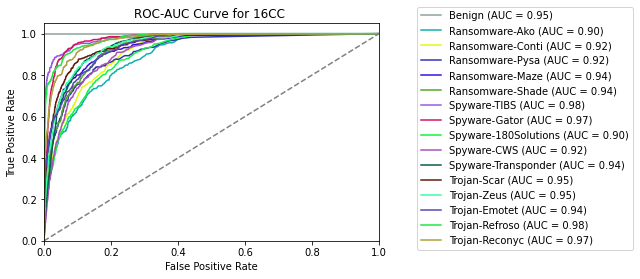

In [31]:
import random
import matplotlib.pyplot as plt

# Function to generate a random color
def get_random_color():
    return (random.random(), random.random(), random.random())

plt.figure()

# Plot ROC curve for Benign
plt.plot(fpr_Benign, tpr_Benign, color=get_random_color(), label=f'Benign (AUC = {roc_auc_Benign:.2f})')
# Plot ROC curve for Ransomware-Ako
plt.plot(fpr_Ako, tpr_Ako, color=get_random_color(), label=f'Ransomware-Ako (AUC = {roc_auc_Ako:.2f})')
# Plot ROC curve for Ransomware-Conti
plt.plot(fpr_Conti, tpr_Conti, color=get_random_color(), label=f'Ransomware-Conti (AUC = {roc_auc_Conti:.2f})')
# Plot ROC curve for Ransomware-Pysa
plt.plot(fpr_Pysa, tpr_Pysa, color=get_random_color(), label=f'Ransomware-Pysa (AUC = {roc_auc_Pysa:.2f})')
# Plot ROC curve for Ransomware-Maze
plt.plot(fpr_Maze, tpr_Maze, color=get_random_color(), label=f'Ransomware-Maze (AUC = {roc_auc_Maze:.2f})')
# Plot ROC curve for Ransomware-Shade
plt.plot(fpr_Shade, tpr_Shade, color=get_random_color(), label=f'Ransomware-Shade (AUC = {roc_auc_Shade:.2f})')
# Plot ROC curve for Spyware-TIBS
plt.plot(fpr_TIBS, tpr_TIBS, color=get_random_color(), label=f'Spyware-TIBS (AUC = {roc_auc_TIBS:.2f})')
# Plot ROC curve for Spyware-Gator
plt.plot(fpr_Gator, tpr_Gator, color=get_random_color(), label=f'Spyware-Gator (AUC = {roc_auc_Gator:.2f})')
# Plot ROC curve for Spyware-180Solutions
plt.plot(fpr_180solutions, tpr_180solutions, color=get_random_color(), label=f'Spyware-180Solutions (AUC = {roc_auc_180solutions:.2f})')
# Plot ROC curve for Spyware-CWS
plt.plot(fpr_CWS, tpr_CWS, color=get_random_color(), label=f'Spyware-CWS (AUC = {roc_auc_CWS:.2f})')
# Plot ROC curve for Spyware-Transponder
plt.plot(fpr_Transponder, tpr_Transponder, color=get_random_color(), label=f'Spyware-Transponder (AUC = {roc_auc_Transponder:.2f})')
# Plot ROC curve for Trojan-Scar
plt.plot(fpr_Scar, tpr_Scar, color=get_random_color(), label=f'Trojan-Scar (AUC = {roc_auc_Scar:.2f})')
# Plot ROC curve for Trojan-Zeus
plt.plot(fpr_Zeus, tpr_Zeus, color=get_random_color(), label=f'Trojan-Zeus (AUC = {roc_auc_Zeus:.2f})')
# Plot ROC curve for Trojan-Emotet
plt.plot(fpr_Emotet, tpr_Emotet, color=get_random_color(), label=f'Trojan-Emotet (AUC = {roc_auc_Emotet:.2f})')
# Plot ROC curve for Trojan-Refroso
plt.plot(fpr_refroso, tpr_refroso, color=get_random_color(), label=f'Trojan-Refroso (AUC = {roc_auc_refroso:.2f})')
# Plot ROC curve for Trojan-Reconyc
plt.plot(fpr_reconyc, tpr_reconyc, color=get_random_color(), label=f'Trojan-Reconyc (AUC = {roc_auc_reconyc:.2f})')

# # Plot settings
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for 16CC ')
#plt.legend(loc="lower right")
plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
#plt.show()
plt.savefig('roc_auc_curve_16CC.png')
# Save also as EPS with tight layout
plt.savefig('ROC_AUC-16CC.eps', format='eps', dpi=1200, bbox_inches='tight')
#plt.savefig("ROC_AUC-16CC.eps",format='eps',dpi=1200)



In [31]:
# # --- Plotting ROC-AUC curves ---
# plt.figure()
# # Plot ROC curve for Trojan-Scar
# plt.plot(fpr_Scar, tpr_Scar, color='green', label=f'Trojan-Scar (AUC = {roc_auc_Scar:.2f})')

# # Plot ROC curve for Trojan-Zeus
# plt.plot(fpr_Zeus, tpr_Zeus, color='cyan', label=f'Trojan-Zeus (AUC = {roc_auc_Zeus:.2f})')

# # Plot ROC curve for Trojan-Emotet
# plt.plot(fpr_Emotet, tpr_Emotet, color='pink', label=f'Trojan-Emotet (AUC = {roc_auc_Emotet:.2f})')

# # Plot ROC curve for Trojan-Refroso
# plt.plot(fpr_refroso, tpr_refroso, color='blue', label=f'Trojan-Refroso (AUC = {roc_auc_refroso:.2f})')

# # Plot ROC curve for Trojan-Reconyc
# plt.plot(fpr_reconyc, tpr_reconyc, color='red', label=f'Trojan-Reconyc (AUC = {roc_auc_reconyc:.2f})')

# # Plot settings
# plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random chance
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-AUC Curve for Trojans')
# plt.legend(loc="lower right")
# plt.show()


## End ---------------------------------------------------------------------------------------------------------------

In [2]:
#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
#Transforming Categorty column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))

In [ ]:
#Transforming Categorty column
#df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))

In [3]:
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-Transponder' else 0)

In [4]:
df['Category'].value_counts()

Category
0    56186
1     2410
Name: count, dtype: int64

In [5]:
#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

In [7]:
#oblique
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')
rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-Transponder is:", accuracy)

starting tree 1
Accuracy for Spyware-Transponder is: 0.9545221843003413


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-Transponder is:", overall_precision)
print("Overall Recall for Spyware-Transponder is:", overall_recall)
print("Overall F1 Score for Spyware-Transponder is:", overall_f1_score)

Overall Precision for Spyware-Transponder is: 0.9555557471570626
Overall Recall for Spyware-Transponder is: 0.9545221843003413
Overall F1 Score for Spyware-Transponder is: 0.9550277011626689


# All Family List
##################################
CategoryList = ['Ransomware-Shade', 'Ransomware-Ako', 'Ransomware-Pysa', 'Ransomware-Maze', 'Ransomware-Conti'                
                'Trojan-Zeus', 'Trojan-Scar', 'Trojan-Refroso', 'Trojan-Reconyc', 'Trojan-Emotet',                
                'Spyware-Transponder', 'Spyware-TIBS', 'Spyware-Gator', 'Spyware-CWS', 'Spyware-180solutions',
                                 'Benign']     
                                 
                                 ##################################

# Spyware-Transponder vs all  

In [9]:
# Spyware-Transponder vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-Transponder' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-Transponder is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-Transponder is:", overall_precision)
print("Overall Recall for Spyware-Transponder is:", overall_recall)
print("Overall F1 Score for Spyware-Transponder is:", overall_f1_score)

max depth: 63
avg leaf node depth: 21.1585
num leaf nodes: 1612933
starting tree 1
Accuracy for Spyware-Transponder is: 0.9542662116040955
Overall Precision for Spyware-Transponder is: 0.9553503841670422
Overall Recall for Spyware-Transponder is: 0.9542662116040955
Overall F1 Score for Spyware-Transponder is: 0.9547961148768098


#  Spyware-TIBS vs all    

In [10]:
#Spyware-TIBS vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-TIBS' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-TIBS is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-TIBS is:", overall_precision)
print("Overall Recall for Spyware-TIBS is:", overall_recall)
print("Overall F1 Score for Spyware-TIBS is:", overall_f1_score)

max depth: 65
avg leaf node depth: 21.1587
num leaf nodes: 1607780
starting tree 1
Accuracy for Spyware-TIBS is: 0.9878839590443687
Overall Precision for Spyware-TIBS is: 0.9871598120585101
Overall Recall for Spyware-TIBS is: 0.9878839590443687
Overall F1 Score for Spyware-TIBS is: 0.9874038683108647


#  Spyware-Gator vs all  

In [11]:
#SSpyware-Gator vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-Gator' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-Gator is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-Gator is:", overall_precision)
print("Overall Recall for Spyware-Gator is:", overall_recall)
print("Overall F1 Score for Spyware-Gator is:", overall_f1_score)

max depth: 53
avg leaf node depth: 18.009
num leaf nodes: 817585
starting tree 1
Accuracy for Spyware-Gator is: 0.971245733788396
Overall Precision for Spyware-Gator is: 0.9736705937580692
Overall Recall for Spyware-Gator is: 0.971245733788396
Overall F1 Score for Spyware-Gator is: 0.9723111552037538


# Spyware-CWS vs all    

In [12]:
#Spyware-CWS  vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-CWS' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-CWS is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-CWS is:", overall_precision)
print("Overall Recall for Spyware-CWS is:", overall_recall)
print("Overall F1 Score for Spyware-CWS is:", overall_f1_score)

max depth: 73
avg leaf node depth: 22.1784
num leaf nodes: 1157626
starting tree 1
Accuracy for Spyware-CWS is: 0.9604948805460751
Overall Precision for Spyware-CWS is: 0.9571389868121432
Overall Recall for Spyware-CWS is: 0.9604948805460751
Overall F1 Score for Spyware-CWS is: 0.9586955213823276


# Spyware-180solutions

In [13]:
#Spyware-180solutions' vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Spyware-180solutions' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Spyware-180solutions is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Spyware-180solutions is:", overall_precision)
print("Overall Recall for Spyware-180solutions is:", overall_recall)
print("Overall F1 Score for Spyware-180solutions is:", overall_f1_score)

max depth: 59
avg leaf node depth: 21.8131
num leaf nodes: 1620570
starting tree 1
Accuracy for Spyware-180solutions is: 0.9626279863481229
Overall Precision for Spyware-180solutions is: 0.9564115217006331
Overall Recall for Spyware-180solutions is: 0.9626279863481229
Overall F1 Score for Spyware-180solutions is: 0.9587521890283162


# Summary - Spyware
#######################################################################################################
                        Accu      Prec     Rec      F1
Spyware-Transponder   95.42      0.9553   0.9542   0.9547
Spyware-TIBS          98.78      0.9878   0.9878   0.9874
Spyware-Gator         97.12      0.9736   0.9712   0.9723
Spyware-CWS           96.04      0.9571   0.9604   0.9586
Spyware-180solutions  96.26      0.9564   0.9626   0.9587


#######################################################################################################
Spyware-Transponder
max depth: 63
avg leaf node depth: 21.1585
num leaf nodes: 1612933
starting tree 1
Accuracy for Spyware-Transponder is: 0.9542662116040955
Overall Precision for Spyware-Transponder is: 0.9553503841670422
Overall Recall for Spyware-Transponder is: 0.9542662116040955
Overall F1 Score for Spyware-Transponder is: 0.9547961148768098

#######################################################################################################
Spyware-TIBS
max depth: 65
avg leaf node depth: 21.1587
num leaf nodes: 1607780
starting tree 1
Accuracy for Spyware-TIBS is: 0.9878839590443687
Overall Precision for Spyware-TIBS is: 0.9871598120585101
Overall Recall for Spyware-TIBS is: 0.9878839590443687
Overall F1 Score for Spyware-TIBS is: 0.9874038683108647

#######################################################################################################
Spyware-Gator
max depth: 53
avg leaf node depth: 18.009
num leaf nodes: 817585
starting tree 1
Accuracy for Spyware-Gator is: 0.971245733788396
Overall Precision for Spyware-Gator is: 0.9736705937580692
Overall Recall for Spyware-Gator is: 0.971245733788396
Overall F1 Score for Spyware-Gator is: 0.9723111552037538

#######################################################################################################
Spyware-CWS
max depth: 73
avg leaf node depth: 22.1784
num leaf nodes: 1157626
starting tree 1
Accuracy for Spyware-CWS is: 0.9604948805460751
Overall Precision for Spyware-CWS is: 0.9571389868121432
Overall Recall for Spyware-CWS is: 0.9604948805460751
Overall F1 Score for Spyware-CWS is: 0.9586955213823276

#######################################################################################################
Spyware-180solutions
max depth: 59
avg leaf node depth: 21.8131
num leaf nodes: 1620570
starting tree 1
Accuracy for Spyware-180solutions is: 0.9626279863481229
Overall Precision for Spyware-180solutions is: 0.9564115217006331
Overall Recall for Spyware-180solutions is: 0.9626279863481229
Overall F1 Score for Spyware-180solutions is: 0.9587521890283162
#######################################################################################################

#'Trojan-Zeus', 'Trojan-Scar', 'Trojan-Refroso', 'Trojan-Reconyc', 'Trojan-Emotet',  

# Trojan-Zeus' vs all

In [14]:
#Trojan-Zeus' vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Zeus' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Zeus is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Zeus is:", overall_precision)
print("Overall Recall for Trojan-Zeus is:", overall_recall)
print("Overall F1 Score for Trojan-Zeus is:", overall_f1_score)

max depth: 62
avg leaf node depth: 22.7968
num leaf nodes: 1625539
starting tree 1
Accuracy for Trojan-Zeus is: 0.9648464163822525
Overall Precision for Trojan-Zeus is: 0.9643510703523677
Overall Recall for Trojan-Zeus is: 0.9648464163822525
Overall F1 Score for Trojan-Zeus is: 0.964594694533641


# Trojan-Scar vs all 

In [15]:
#Trojan-Scar vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Scar' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Scar is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Scar is:", overall_precision)
print("Overall Recall for Trojan-Scar is:", overall_recall)
print("Overall F1 Score for Trojan-Scar is:", overall_f1_score)

max depth: 60
avg leaf node depth: 19.959
num leaf nodes: 1470759
starting tree 1
Accuracy for Trojan-Scar is: 0.9701365187713311
Overall Precision for Trojan-Scar is: 0.9700632291064896
Overall Recall for Trojan-Scar is: 0.9701365187713311
Overall F1 Score for Trojan-Scar is: 0.9700997457231142


# Trojan-Refroso vs all

In [16]:
#Trojan-Refroso vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Refroso' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Refroso is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Refroso is:", overall_precision)
print("Overall Recall for Trojan-Refroso is:", overall_recall)
print("Overall F1 Score for Trojan-Refroso is:", overall_f1_score)

max depth: 65
avg leaf node depth: 22.0489
num leaf nodes: 1347287
starting tree 1
Accuracy for Trojan-Refroso is: 0.9822525597269625
Overall Precision for Trojan-Refroso is: 0.9814045493131233
Overall Recall for Trojan-Refroso is: 0.9822525597269625
Overall F1 Score for Trojan-Refroso is: 0.9817116063288996


# Trojan-Reconyc vs all

In [17]:
#Trojan-Reconyc vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Reconyc' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Reconyc is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Reconyc is:", overall_precision)
print("Overall Recall for Trojan-Reconyc is:", overall_recall)
print("Overall F1 Score for Trojan-Reconyc is:", overall_f1_score)

max depth: 58
avg leaf node depth: 19.8452
num leaf nodes: 894916
starting tree 1
Accuracy for Trojan-Reconyc is: 0.9790102389078499
Overall Precision for Trojan-Reconyc is: 0.9785322238802636
Overall Recall for Trojan-Reconyc is: 0.9790102389078499
Overall F1 Score for Trojan-Reconyc is: 0.9787600645336847


# Trojan-Emotet vs all 

In [18]:
#Trojan-Emotet vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Trojan-Emotet' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Trojan-Emotet is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Trojan-Emotet is:", overall_precision)
print("Overall Recall for Trojan-Emotet is:", overall_recall)
print("Overall F1 Score for Trojan-Emotet is:", overall_f1_score)

max depth: 58
avg leaf node depth: 20.6194
num leaf nodes: 1032569
starting tree 1
Accuracy for Trojan-Emotet is: 0.971160409556314
Overall Precision for Trojan-Emotet is: 0.9694848101620752
Overall Recall for Trojan-Emotet is: 0.971160409556314
Overall F1 Score for Trojan-Emotet is: 0.9702473814901494


# Summary - Trojan
#######################################################################################################
                        Accu      Prec     Rec      F1
Trojan-Zeus            96.48    0.9643    0.9648    0.9645
Trojan-Scar            97.01    0.9700    0.9701    0.9700   
Trojan-Refroso         98.22    0.9814    0.9822    0.9817  
Trojan-Reconyc         97.90    0.9785    0.9790    0.9787 
Trojan-Emotet          97.11    0.9694    0.9711    0.9702

#######################################################################################################
Trojan-Zeus

max depth: 62
avg leaf node depth: 22.7968
num leaf nodes: 1625539
starting tree 1
Accuracy for Trojan-Zeus is: 0.9648464163822525
Overall Precision for Trojan-Zeus is: 0.9643510703523677
Overall Recall for Trojan-Zeus is: 0.9648464163822525
Overall F1 Score for Trojan-Zeus is: 0.964594694533641

#######################################################################################################
Trojan-Scar

max depth: 60
avg leaf node depth: 19.959
num leaf nodes: 1470759
starting tree 1
Accuracy for Trojan-Scar is: 0.9701365187713311
Overall Precision for Trojan-Scar is: 0.9700632291064896
Overall Recall for Trojan-Scar is: 0.9701365187713311
Overall F1 Score for Trojan-Scar is: 0.9700997457231142

#######################################################################################################
Trojan-Refroso

max depth: 65
avg leaf node depth: 22.0489
num leaf nodes: 1347287
starting tree 1
Accuracy for Trojan-Refroso is: 0.9822525597269625
Overall Precision for Trojan-Refroso is: 0.9814045493131233
Overall Recall for Trojan-Refroso is: 0.9822525597269625
Overall F1 Score for Trojan-Refroso is: 0.9817116063288996

#######################################################################################################
Trojan-Reconyc

max depth: 58
avg leaf node depth: 19.8452
num leaf nodes: 894916
starting tree 1
Accuracy for Trojan-Reconyc is: 0.9790102389078499
Overall Precision for Trojan-Reconyc is: 0.9785322238802636
Overall Recall for Trojan-Reconyc is: 0.9790102389078499
Overall F1 Score for Trojan-Reconyc is: 0.9787600645336847

#######################################################################################################
Trojan-Emotet 

max depth: 58
avg leaf node depth: 20.6194
num leaf nodes: 1032569
starting tree 1
Accuracy for Trojan-Emotet is: 0.971160409556314
Overall Precision for Trojan-Emotet is: 0.9694848101620752
Overall Recall for Trojan-Emotet is: 0.971160409556314
Overall F1 Score for Trojan-Emotet is: 0.9702473814901494
#######################################################################################################

####################################################################################################

#'Ransomware-Shade', 'Ransomware-Ako', 'Ransomware-Pysa', 'Ransomware-Maze', 'Ransomware-Conti' 

# Ransomware-Shade vs all

In [19]:
#Ransomware-Shade vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Shade' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Shade is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Shade is:", overall_precision)
print("Overall Recall for Ransomware-Shade is:", overall_recall)
print("Overall F1 Score for Ransomware-Shade is:", overall_f1_score)

max depth: 66
avg leaf node depth: 22.1242
num leaf nodes: 1415135
starting tree 1
Accuracy for Ransomware-Shade is: 0.9629692832764505
Overall Precision for Ransomware-Shade is: 0.9619059119166896
Overall Recall for Ransomware-Shade is: 0.9629692832764505
Overall F1 Score for Ransomware-Shade is: 0.9624221003189847


# 'Ransomware-Ako vs all 

In [20]:
# 'Ransomware-Ako vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Ako' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Ako is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Ako is:", overall_precision)
print("Overall Recall for Ransomware-Ako is:", overall_recall)
print("Overall F1 Score for Ransomware-Ako is:", overall_f1_score)

max depth: 69
avg leaf node depth: 22.1942
num leaf nodes: 1529890
starting tree 1
Accuracy for Ransomware-Ako is: 0.9622013651877133
Overall Precision for Ransomware-Ako is: 0.9594808681746843
Overall Recall for Ransomware-Ako is: 0.9622013651877133
Overall F1 Score for Ransomware-Ako is: 0.9607546611419132


# Ransomware-Pysa vs all

In [21]:
#Ransomware-Pysa vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Pysa' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Pysa is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Pysa is:", overall_precision)
print("Overall Recall for Ransomware-Pysa is:", overall_recall)
print("Overall F1 Score for Ransomware-Pysa is:", overall_f1_score)

max depth: 56
avg leaf node depth: 20.9015
num leaf nodes: 1704622
starting tree 1
Accuracy for Ransomware-Pysa is: 0.968259385665529
Overall Precision for Ransomware-Pysa is: 0.9671986172561212
Overall Recall for Ransomware-Pysa is: 0.968259385665529
Overall F1 Score for Ransomware-Pysa is: 0.9677110014057925


# Ransomware-Maze

In [23]:
# Ransomware-Maze   #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Maze' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Maze  is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Maze  is:", overall_precision)
print("Overall Recall for Ransomware-Maze  is:", overall_recall)
print("Overall F1 Score for Ransomware-Maze  is:", overall_f1_score)

max depth: 59
avg leaf node depth: 20.9016
num leaf nodes: 1480645
starting tree 1
Accuracy for Ransomware-Maze  is: 0.970221843003413
Overall Precision for Ransomware-Maze  is: 0.9683785447652633
Overall Recall for Ransomware-Maze  is: 0.970221843003413
Overall F1 Score for Ransomware-Maze  is: 0.9692030535360171


# Ransomware-Conti vs all

In [24]:
# Ransomware-Conti vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Ransomware-Conti' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Ransomware-Conti is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Ransomware-Conti is:", overall_precision)
print("Overall Recall for Ransomware-Conti is:", overall_recall)
print("Overall F1 Score for Ransomware-Conti is:", overall_f1_score)

max depth: 57
avg leaf node depth: 19.8344
num leaf nodes: 1373559
starting tree 1
Accuracy for Ransomware-Conti is: 0.9620307167235495
Overall Precision for Ransomware-Conti is: 0.9580645187196424
Overall Recall for Ransomware-Conti is: 0.9620307167235495
Overall F1 Score for Ransomware-Conti is: 0.9598377851820181


# Summary - Ransomware
#######################################################################################################
                        Accu      Prec     Rec      F1
Ransomware-Shade      96.29     0.9619    0.9629   0.9624
Ransomware-Ako        96.22     0.9594    0.9622   0.9607
Ransomware-Pysa       96.82     0.9671    0.9682   0.9677
Ransomware-Maze       97.02     0.9683    0.9702   0.9692
Ransomware-Conti      96.20     0.9580    0.9620   0.9598


#######################################################################################################
Ransomware-Shade
max depth: 66
avg leaf node depth: 22.1242
num leaf nodes: 1415135
starting tree 1
Accuracy for Ransomware-Shade is: 0.9629692832764505
Overall Precision for Ransomware-Shade is: 0.9619059119166896
Overall Recall for Ransomware-Shade is: 0.9629692832764505
Overall F1 Score for Ransomware-Shade is: 0.9624221003189847
#######################################################################################################
Ransomware-Ako
max depth: 69
avg leaf node depth: 22.1942
num leaf nodes: 1529890
starting tree 1
Accuracy for Ransomware-Ako is: 0.9622013651877133
Overall Precision for Ransomware-Ako is: 0.9594808681746843
Overall Recall for Ransomware-Ako is: 0.9622013651877133
Overall F1 Score for Ransomware-Ako is: 0.9607546611419132
#######################################################################################################
Ransomware-Pysa
max depth: 56
avg leaf node depth: 20.9015
num leaf nodes: 1704622
starting tree 1
Accuracy for Ransomware-Pysa is: 0.968259385665529
Overall Precision for Ransomware-Pysa is: 0.9671986172561212
Overall Recall for Ransomware-Pysa is: 0.968259385665529
Overall F1 Score for Ransomware-Pysa is: 0.9677110014057925
#######################################################################################################
Ransomware-Maze
max depth: 59
avg leaf node depth: 20.9016
num leaf nodes: 1480645
starting tree 1
Accuracy for Ransomware-Maze  is: 0.970221843003413
Overall Precision for Ransomware-Maze  is: 0.9683785447652633
Overall Recall for Ransomware-Maze  is: 0.970221843003413
Overall F1 Score for Ransomware-Maze  is: 0.9692030535360171

#######################################################################################################
Ransomware-Conti
max depth: 57
avg leaf node depth: 19.8344
num leaf nodes: 1373559
starting tree 1
Accuracy for Ransomware-Conti is: 0.9620307167235495
Overall Precision for Ransomware-Conti is: 0.9580645187196424
Overall Recall for Ransomware-Conti is: 0.9620307167235495
Overall F1 Score for Ransomware-Conti is: 0.9598377851820181
#######################################################################################################

# Benign vs all 

In [25]:
# Benign vs all    #Whole code in single cell

#df=pd.read_csv('/content/Obfuscated-MalMem2022.csv')
df = pd.read_csv("Obfuscated-MalMem2022.csv")
df['Category'].value_counts()
#Transforming Category column
df['Category'] = df['Category'].apply(lambda x: '-'.join(x.split('-', 2)[:2]))
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'Benign' else 0)
df['Category'].value_counts()

#Normalization of numerical features
from sklearn.preprocessing import MinMaxScaler
nr=MinMaxScaler()
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Category']=enc.fit_transform(df['Category'])
df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']]=nr.fit_transform(df[['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc','handles.nhandles','handles.avg_handles_per_proc','handles.nfile','handles.nevent','handles.ndesktop','handles.nkey','handles.nthread','handles.ndirectory','handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem','ldrmodules.not_in_load_avg','ldrmodules.not_in_init_avg','ldrmodules.not_in_mem_avg','malfind.ninjections','malfind.commitCharge','malfind.protection','malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool','psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg','psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg','psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services','svcscan.shared_process_services','svcscan.nactive','callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']])
X = df.copy(deep=True)
y = X['Category']
X = X.drop(['Class', 'Category', 'svcscan.interactive_process_services','pslist.nprocs64bit','handles.nport'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SMOTE OverSampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train,y_train)

#Applying SPORF
from sklearn.model_selection import RandomizedSearchCV
import rerf
from rerf.rerfClassifier import rerfClassifier
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import train_test_split
#y=df['Category']
#X=df2.drop("Category",axis='columns')

rf = rerfClassifier()

rf.fit(X_smote, Y_smote)

# Predict class labels
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Benign is:", accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate overall precision, recall, and F1 score
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print("Overall Precision for Benign is:", overall_precision)
print("Overall Recall for Benign is:", overall_recall)
print("Overall F1 Score for Benign- is:", overall_f1_score)

max depth: 72
avg leaf node depth: 23.7701
num leaf nodes: 1599611
starting tree 1
Accuracy for Benign is: 0.999914675767918
Overall Precision for Benign is: 0.9999146901540641
Overall Recall for Benign is: 0.999914675767918
Overall F1 Score for Benign- is: 0.9999146756803191
